<a href="https://www.kaggle.com/code/matinmahmoudi/from-scratch-modified-perceptron-using-oop?scriptVersionId=214062281" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌿 🧱 From Scratch: Modified Perceptron Using OOP
## Introduction to the Perceptron Algorithm

In this notebook, we implement a **modified version of the Perceptron Algorithm** from scratch using **Object-Oriented Programming (OOP)** principles. The perceptron is one of the simplest and most foundational binary classifiers that aims to find a linear decision boundary between two classes. **For educational purposes**, we have slightly altered the original perceptron by introducing a more structured and detailed implementation of the algorithm, keeping the core principles intact.

### What is a Perceptron?

The perceptron is a **supervised learning algorithm** used for binary classification. It attempts to learn a set of weights that can linearly separate data points into two distinct classes, usually labeled as `-1` and `1`. The perceptron updates its weights iteratively, adjusting for misclassified samples until convergence or a maximum number of iterations.

#### Key Concepts:
- **Linear Decision Boundary**: The perceptron attempts to find a linear boundary (hyperplane) that separates the data points into two classes.
- **Hinge Loss**: We use the hinge loss function to guide the weight updates. The hinge loss penalizes only misclassified examples. The formula for the hinge loss is:
  $$
  L = \max(0, -y \cdot \hat{y})
  $$
  Here, \( y \) is the true label, and \( \hat{y} \) is the raw score predicted by the perceptron model. Only when \( y \cdot \hat{y} < 0 \) (i.e., when the point is misclassified) does this loss become positive.

### Modified Perceptron for Educational Purposes

In this implementation, we slightly **modify the original perceptron** for clarity and ease of understanding. This version of the perceptron still follows the classic weight update rule but has a more detailed and structured format, which mirrors how modern machine learning models are implemented using **gradient-based optimization**. Additionally, the bias term is merged into the weight vector for simplicity.

### Perceptron Training Process

The perceptron works by iterating over the dataset and adjusting its weights using **gradient descent**. It performs the following steps:
1. **Prediction**: For each input \( X \), the perceptron computes a raw score \( \hat{y} = X \cdot w \). The predicted class is then thresholded at 0 (i.e., class = 1 if \( \hat{y} \geq 0 \), otherwise class = -1).
2. **Loss Calculation**: The perceptron computes **hinge loss** for each prediction, which penalizes only misclassified points:
   $$
   L = \max(0, -y \cdot \hat{y})
   $$
3. **Weight Update**: The weights are updated using the gradient of the loss with respect to the weights, but **only for misclassified points** (where \( y \cdot \hat{y} < 0 \)). The gradient update formula is:
   $$
   \nabla L = -y \cdot X \quad \text{for misclassified points}
   $$

### Why is This Important for SVMs?

This modified perceptron implementation will serve as a stepping stone for more advanced models, such as **Support Vector Machines (SVMs)**. Both the perceptron and SVMs aim to find a linear decision boundary, but SVMs extend this idea by focusing on **maximizing the margin** between classes. Let’s look at how they differ:

- **Perceptron**: The perceptron simply finds a linear boundary that separates the classes, based on hinge loss and misclassified points.
- **SVM**: The SVM finds the linear boundary that **maximizes the margin** (the distance between the closest points from each class, known as support vectors).

#### Key Differences:
- **Loss Function**: The perceptron uses hinge loss, whereas **SVM** introduces a **soft margin** loss function that allows for some misclassified points but attempts to minimize their influence.
- **Margin Maximization**: While the perceptron does not explicitly consider the margin between classes, **SVM** seeks to maximize the margin, which leads to better generalization and performance, particularly with complex datasets.

By understanding this modified version of the perceptron, you’ll be better prepared to extend these concepts to **Support Vector Machines (SVMs)**, where the focus shifts from simply finding a separating hyperplane to maximizing the distance between the classes.

### Next Steps

In future notebooks, we will build upon this perceptron implementation to introduce **SVMs**. We’ll explore how SVMs improve upon the perceptron by focusing on the **support vectors** and maximizing the **margin** to achieve better generalization and performance on more complex datasets.


In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Perceptron implemented from scratch using hinge loss and gradient descent.
    """

    def __init__(self, in_features, epochs=1000, learning_rate=0.01, tolerance=1e-6, verbose=0, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features + 1)  # Including bias in weight vector
        self.epochs = epochs  # Number of iterations
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.tolerance = tolerance  # Tolerance for early stopping
        self.verbose = verbose  # Verbosity level
        self.loss_history_ = []  # History of loss values
        self.accuracy_history_ = []  # History of accuracy values

    def _add_bias(self, X):
        """
        Add a bias term to the input data by appending a column of ones.
        X_bias = [1, x1, x2, ... xn]
        """
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y):
        """
        Fit the perceptron model using gradient descent.
        Updates weights only based on examples where y * y_hat < 0 (misclassified).
        """
        X_bias = self._add_bias(X)  # Shape: (n_samples, n_features + 1)
        y = y.flatten()  # Ensure y is a 1D array of shape (n_samples,)

        for epoch in range(self.epochs):
            y_hat = self.predict(X_bias)  # Shape: (n_samples,)
            loss = self._loss(y, y_hat)
            grad_w = self._grad(X_bias, y, y_hat)

            self.w -= self.learning_rate * grad_w
            self.loss_history_.append(loss)

            if self.verbose and epoch % 100 == 0:
                accuracy = self.score(X, y)
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

            # Early stopping based on tolerance
            if epoch > 0 and abs(self.loss_history_[-2] - self.loss_history_[-1]) < self.tolerance:
                if self.verbose:
                    print(f"Early stopping at epoch {epoch}")
                break

        self.plot_learning_curve()

    def predict(self, X):
        """
        Predict raw scores (without thresholding).
        Prediction: y_hat = Xw
        """
        return X @ self.w  # Returns a 1D array of shape (n_samples,)

    def predict_class(self, X):
        """
        Predict class labels by applying a threshold of 0 to the output.
        Class prediction: y_pred = 1 if Xw >= 0 else -1
        """
        X_bias = self._add_bias(X)
        return np.where(self.predict(X_bias) >= 0, 1, -1)

    def score(self, X, y):
        """
        Calculate the accuracy of the model.
        Accuracy: (Number of correct predictions) / (Total predictions)
        """
        y_pred = self.predict_class(X)
        return np.mean(y == y_pred)

    def _loss(self, y, y_hat):
        """
        Hinge loss:
        L = mean(max(0, -y * y_hat))
        """
        return np.maximum(0, -y * y_hat).mean()

    def _grad(self, X, y, y_hat):
        """
        Gradient of hinge loss:
        ∇L = -mean(y * X) for misclassified points (where y * y_hat < 0)
        """
        # Calculate gradients only for misclassified examples (y * y_hat < 0)
        mask = y * y_hat < 0  # Shape: (n_samples,)
        X_misclassified = X[mask]  # Shape: (n_misclassified, n_features + 1)
        y_misclassified = y[mask]  # Shape: (n_misclassified,)

        # Reshape y_misclassified to (n_misclassified, 1) for broadcasting
        y_misclassified = y_misclassified[:, np.newaxis]  # Shape: (n_misclassified, 1)

        # Compute gradient
        grad_w = (-y_misclassified * X_misclassified).mean(axis=0)  # Shape: (n_features + 1,)

        return grad_w

    def plot_learning_curve(self):
        """
        Plot the learning curve for the model's loss over epochs.
        """
        if self.loss_history_:
            plt.plot(self.loss_history_)
            plt.title("Learning Curve")
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.grid(True)
            plt.show()

    def __repr__(self):
        return f'Perceptron(epochs={self.epochs}, learning_rate={self.learning_rate}, tolerance={self.tolerance})'


Epoch 0: Loss = 0.3972, Accuracy = 0.5353
Epoch 100: Loss = 0.0021, Accuracy = 0.9758
Epoch 200: Loss = 0.0008, Accuracy = 0.9755
Epoch 300: Loss = 0.0008, Accuracy = 0.9669
Epoch 400: Loss = 0.0008, Accuracy = 0.9686
Epoch 500: Loss = 0.0008, Accuracy = 0.9684
Epoch 600: Loss = 0.0008, Accuracy = 0.9689
Epoch 700: Loss = 0.0008, Accuracy = 0.9689
Epoch 800: Loss = 0.0008, Accuracy = 0.9686
Epoch 900: Loss = 0.0008, Accuracy = 0.9688


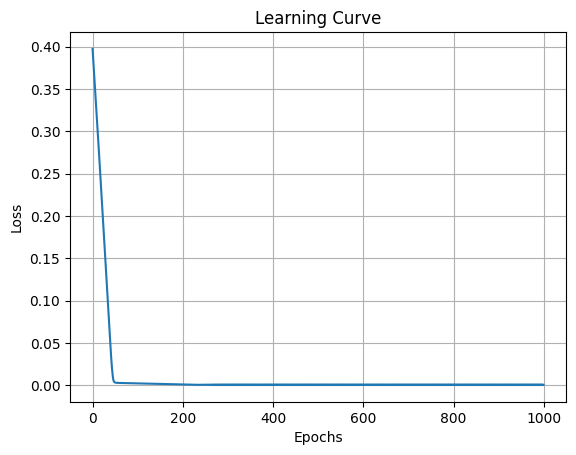

Accuracy: 0.9340


In [3]:
# Generate a random binary classification problem using sklearn's make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.01, random_state=42)

# Convert class labels from (0, 1) to (-1, 1) as expected by the Perceptron
y = np.where(y == 0, -1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for Perceptron as it helps with convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Perceptron model
model = Perceptron(in_features=X_train.shape[1], epochs=1000, learning_rate=0.01, verbose=1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict_class(X_test)

# Evaluate the model performance using accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


# Wrapping Up

Thank you for following along with this implementation of the **Perceptron Algorithm** using OOP from scratch! I hope this notebook helped you gain a clearer understanding of how the Perceptron works, particularly in the context of **binary classification** and the power of **Object-Oriented Programming** in structuring machine learning models.

This modified Perceptron is not only a stepping stone for understanding linear classifiers but also prepares you for diving into more advanced topics like **Support Vector Machines (SVMs)** in the near future.

If you have any questions or if something wasn’t clear, feel free to leave a comment! I’d also love to hear your feedback and suggestions on how to improve, so don’t hesitate to share your thoughts.

Happy coding and keep learning! 😊
